## End-to-End Analysis and Prediction of Loan Approval with Deployment

This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors.

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
  .container { width:80% !important; }  
</style>

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Load data

In [4]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand variables

In [5]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls', 'Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].isnull().sum(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Number of nulls,Values,Explanation
Variable,,,,
credit_policy,2,0,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,0,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


Now we can start to explore this dataset at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

###  Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |

## PROBLEM STATEMENT 
---

The purpose is to gain useful insight from the available data and train a model to predict the probability of a loan not being paid in full

In the first part, the exploratory analysis will provide information and insights on the data. Tables and visualizations will be used to better understand the available data and answer relevant questions

In the second part, the data will be used to predict the probability of a loan not being paid in full. Different models will be train and the best-performing one will be selected.




### RESEARCH
---
*some information for context from:* https://www.capitalone.com/learn-grow/money-management/revolving-credit-balance/
#### How Does Revolving Credit Work?
If you’re approved for a revolving credit account, like a credit card, the lender will set a credit limit. The credit limit is the maximum amount you can charge to that account. When you make a purchase, you’ll have less available credit. And every time you make a payment, your available credit goes back up.

Revolving credit accounts are open ended, meaning they don’t have an end date. As long as the account remains open and in good standing, you can continue to use it. Keep in mind that your minimum payment might vary from month to month because it’s often calculated based on how much you owe at that time. 

#### What Is a Revolving Balance?
If you don’t pay the balance on your revolving credit account in full every month, the unpaid portion carries over to the next month. That’s called a revolving balance. 

You might apply for credit assuming you’ll always pay your balance in full every month. But real life can get in the way. Cars break down. Doctors’ appointments come up. And if you can’t pay your full balance, you’ll find yourself carrying a revolving balance to the following month. 

#### What About Revolving Balances and Interest?
As the Consumer Financial Protection Bureau (CFPB) explains, “A credit card’s interest rate is the price you pay for borrowing money.” And the higher your revolving balance, the more interest you might be charged. But you can typically avoid interest charges by paying your balance in full every month. 

#### What’s Revolving Utilization and How Does It Impact Credit Score?
Your credit utilization ratio—sometimes called revolving utilization—is how much available credit you have compared with the amount of credit you’re using. According to the CFPB, you can calculate your credit utilization ratio by dividing your total balances across all of your accounts by your total credit limit.

So why does your credit utilization ratio matter? It’s one of the factors that determines your credit score. If you manage credit responsibly and keep your utilization ratio relatively low, it might help you improve your credit score. The CFPB recommends keeping your utilization below 30% of your available credit. 

## EXPLORATORY ANALYSIS
---
Before going into the analysis, the dataset has to be examined and cleaned.

### FEATURES 
From the introduction above we know what features are available and their types. For convenience we can organize the features of the dataset in useful groups:  
* NUMERIC features containing numeric data
* BINARY  features containing binary data (0,1)
* CATEGORICAL features with categorical values
* LOAN    features related to the loan itself
* PERSON  features related to the person getting the loan
* TARGET  the target feature for training the model

In [6]:
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico", "days_with_cr_line", "revol_bal", "revol_util", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
BINARY = ["credit_policy","not_fully_paid"]
CATEGORICAL = ["purpose"]
LOAN = ["int_rate", "installment", "days_with_cr_line", "revol_bal", "revol_util"]
PERSON = ["log_annual_inc", "dti", "fico", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
TARGET = ["not_fully_paid"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

### MISSING VALUES & IMPUTATION
Missing values might create errors in the analysis. From the table above, we can see that there are no missing values, so we can skip the imputation step :)  
(Added another column in the "Understand Variables" section above, the "Number of nulls".)

### OUTLIERS
Outliers might skew aggregations and create bias in the training model. The dataset does not have many features (columns) so we can check the min & max of each feature and locate outliers. For example, for the binary features we expect values of 0 minimum and 1 maximum. 


In [7]:
df[BINARY].agg(['min','max'])

,credit_policy,not_fully_paid
min,0,0
max,1,1


In [8]:
df[NUMERIC].agg(['min','max']).round(2)

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
min,0.06,15.67,7.55,0.00,612,178.96,0,0.0,0,0,0
max,0.22,940.14,14.53,29.96,827,17639.96,1207359,119.0,33,13,5


The ranges of each feature seem to be within the expected ranges, except for *revol_bal*: this range is from 0 to 1.2 milions! Let's examine this feature in more detail by visually showing its distribution with a boxplot:

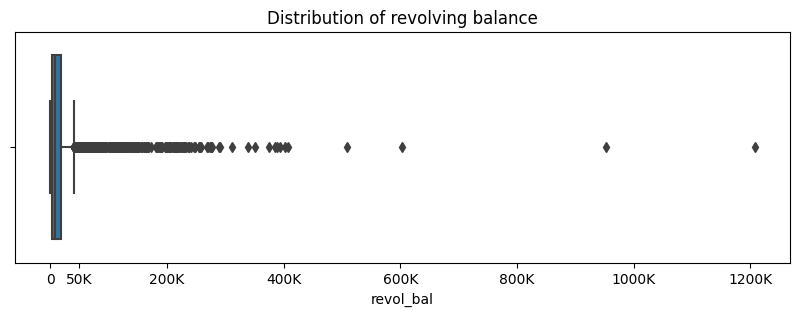

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='revol_bal')
plt.xticks(ticks=[0,50000,200000,400000,600000,800000,1000000,1200000], labels=['0','50K','200K','400K','600K','800K','1000K','1200K'])
plt.title("Distribution of revolving balance");

OK, the boxplot shows that the majority of the values are certainly below 50,000 with several outliers from 50,000 to 500,000; **there are also 4 extreme points above 500,000!**  There four points might be due to error or they might be real extreme cases. Whatever the case, they would introduce bias to further analysis and model-training. Since there are more than 9500 entries in total, we can drop these extreme four without loosing much information and explanatory power.

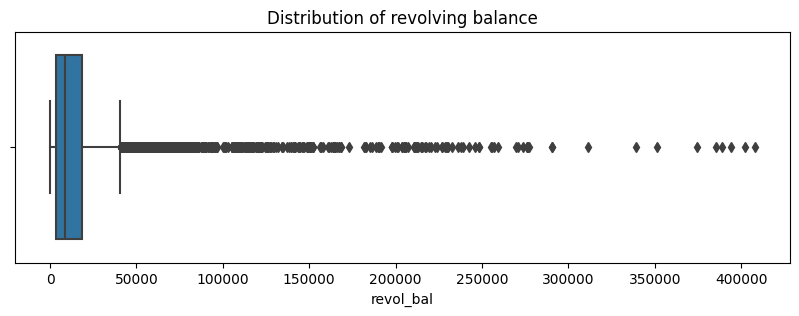

In [10]:
# get the indices of the extreme outliers and drop them
indices = df[df['revol_bal'] > 500000].index
df_clean = df.drop(indices)
# check the boxplot again:
plt.figure(figsize=(10,3))
sns.boxplot(data=df_clean, x='revol_bal')
plt.title("Distribution of revolving balance");

Things look better now, there are still some outliers but they are not extreme and they should be useful in training our model.

### The nature of loans
Let's examine the loans by various variables and gain insights.

First, Visualizing the distribution of target variable “not.fully.paid”

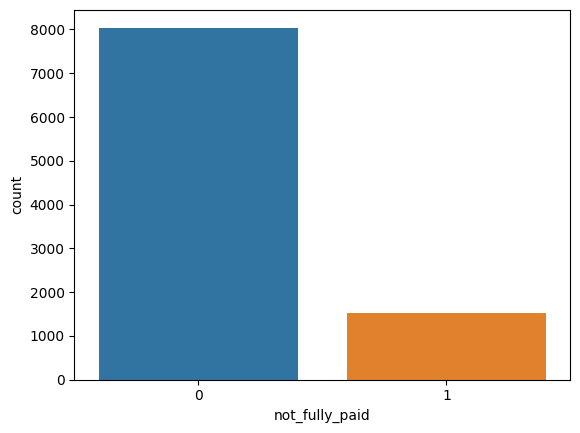

In [21]:
sns.countplot(x="not_fully_paid", data=df_clean)
plt.show()

let's see the purpose of the loans in detail:

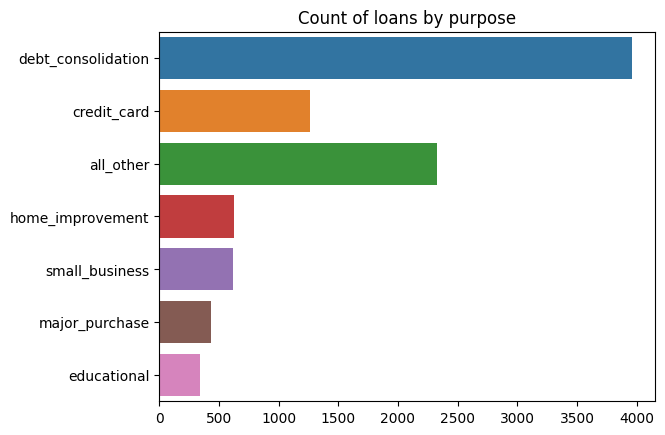

In [11]:
# import visualisations
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns

#To gain some insights, we can visualize what kind of loans people get: 
sns.countplot(y =df_clean.purpose)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Count of loans by purpose");

The visual shows that most loans are issued for debt consollidation and for purposes grouped together in "all_other" category. The least number of loans are educational and for major purchases. Now, let's see how many of these loans are not fully paid back:

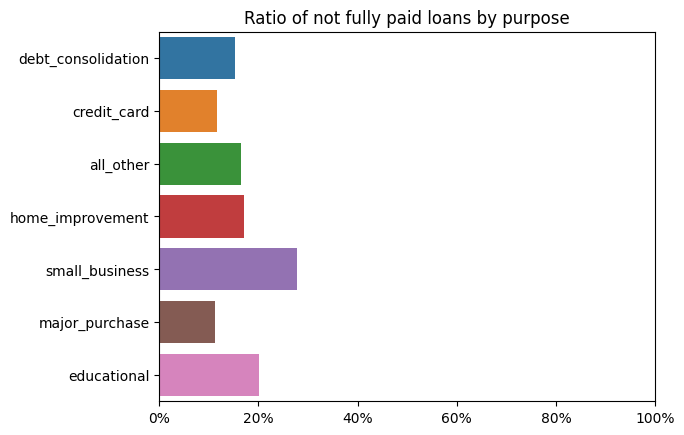

In [12]:
#convert not_fully_paid to int for convenience, to calc the mean
ax = sns.barplot( y=df_clean.purpose, x=df_clean.not_fully_paid.astype('int'), ci=None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.title("Ratio of not fully paid loans by purpose")
plt.xlim(0,1)
plt.ylabel(None)
plt.xlabel(None);

We can see that **the purpose of a loan is related to whether it is fully paid back or not:** Loans for small_business and education have the higher ratio of not being paid back (27% and 20%), while major purchases and credit card funding are less risky. Finally, let's see the same but for *credit_policy* feature, which is 1 if the customer meets the credit underwriting criteria and 0 otherwise:

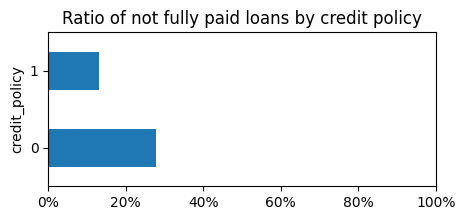

In [13]:
# display the ratio of not_fully_paid by credit_policy
ratio = df_clean.groupby('credit_policy')['not_fully_paid'].mean()
ax = ratio.plot.barh(figsize=(5,2), title='Ratio of not fully paid loans by credit policy')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xlim(0,1);

Nice, looks like only 13% of people that meet the credit criteria do not pay back their loans, while **the percentage is doubled to 28% for those that do not meet the criteria.**


Let's examine some of the other features in relation to whether a loan was fully paid back or not. Since we ultimately are interested in predicting the probability of not fully paying back loans, *we should only consider the features that are available at the time of issuing a loan:* 
- int_rate, 
- installment, 
- log_annual_inc, 
- dti, 
- fico.

We define a helper function to help with displaying various metrics and comparisons for each feature. Boxplots will be used to visualize the summaries of each category; boxplots are standard tools in an analyst's arsenal, but [here is some information from wikipedia for refreshment.](https://en.wikipedia.org/wiki/Box_plot) 

In [14]:
# function to plot visuals about the distribution of a feature by various categories of interest

def show_distribution(feature='int_rate', name="Interest Rate"):
    # define the subplot areas
    fig, axes = plt.subplots(1,3, figsize=(15,6))
    
    # plot the boxplots by purpose
    sns.boxplot(data=df_clean, x=feature, y='purpose', ax=axes[0], )
    axes[0].set_ylabel("")
    axes[0].set_xlabel(name)
    axes[0].set_title(name+" by loan purpose")
    # plot the boxplots by not_fully_paid
    y = df_clean.not_fully_paid.astype('category') 
    sns.boxplot(data=df_clean, x=feature, y=y, ax=axes[1])    
    axes[1].set_ylabel("not fully paid")
    axes[1].set_xlabel(name)
    axes[1].set_title(name+" by paid status")
    # plot the feature distribution 
    sns.histplot(x=df_clean[feature], cumulative=False, ax=axes[2])
    #axes[2].set_ylabel("not fully paid")
    axes[2].set_xlabel(name)
    axes[2].set_title("Distribution of "+name)

#### int_rate, Interest Rate
From Data Dictionary: "The interest rate of the loan (more risky borrowers are assigned higher interest rates)"  



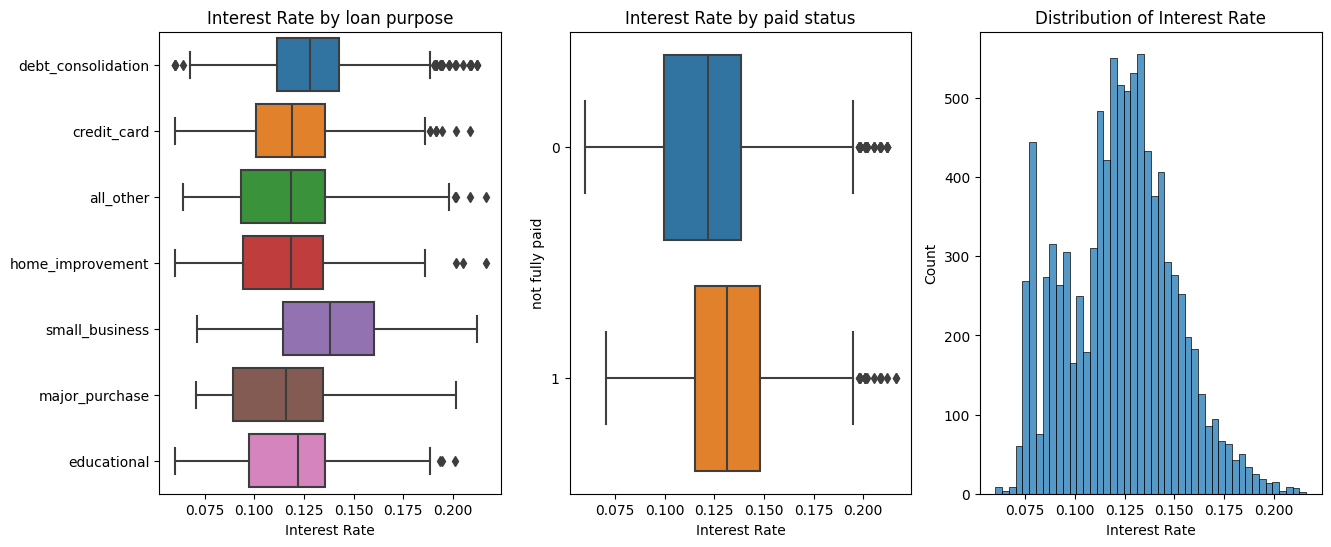

In [15]:
show_distribution('int_rate','Interest Rate')

The first graph shows that the purpose of a loan does not affect its interest rate much, since we see the boxes at the same place for each purpose. There is one exception though: **loans for small businesses tend to have higher interest rates** than the rest; their average is higher than the 75th prcentile (the right edge of the box) of other purposes. This means that 75% of the loans for other purposes have lower interest rates than the average interest rate for small business loans.

The second graph shows that the loans that were not fully paid back have slightly higher interest rates, but not by a significant amount. In the third graph we see that the interest rates tend to follow a *normal distribution* with a lot of extra loans having rates lower than the average, skewing the distribution to the left a bit.

#### installment, Monthly installment amount
From the data dictionary: "The monthly installments owed by the borrower if the loan is funded."

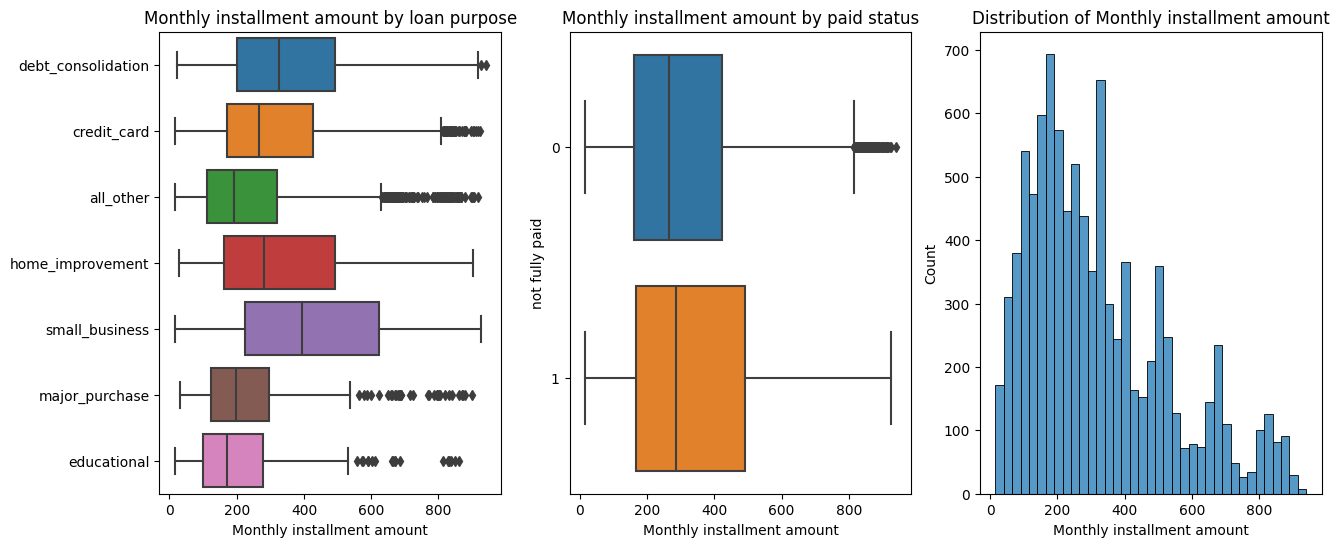

In [16]:
show_distribution('installment', "Monthly installment amount")

We can see that the installment amount changes related to the pupose of the loan, with **loans for small businesses, debt consolidation & home improvement having the highest range of installements.** The installment amount does not seem to have any relation to paying back loans, the differences there are negligible. The distribution of installments amount shows that most loans have lower installments, below $400.

Let's compare the summary statistics for installment amounts of small business loans vs all the rest in more detail:

In [17]:
# seperate loans for small business from others and show summary statistics:
df_clean.groupby(by=lambda x: df_clean.loc[x].purpose == 'small_business', sort=False)['installment'].describe().round().rename({0:"Others",1:"Small Business"})

,count,mean,std,min,25%,50%,75%,max
Others,8957.0,311.0,202.0,16.0,162.0,263.0,414.0,940.0
Small Business,617.0,433.0,248.0,16.0,225.0,393.0,624.0,927.0


Now it is more obvious: although the min & max of them are practically the same between the two groups, **the mean amount of monthly installment amounts is $120 higher for small business loans.**

#### log_annual_inc, Annual Income
From the data dictionary: "The natural log of the self-reported annual income of the borrower."

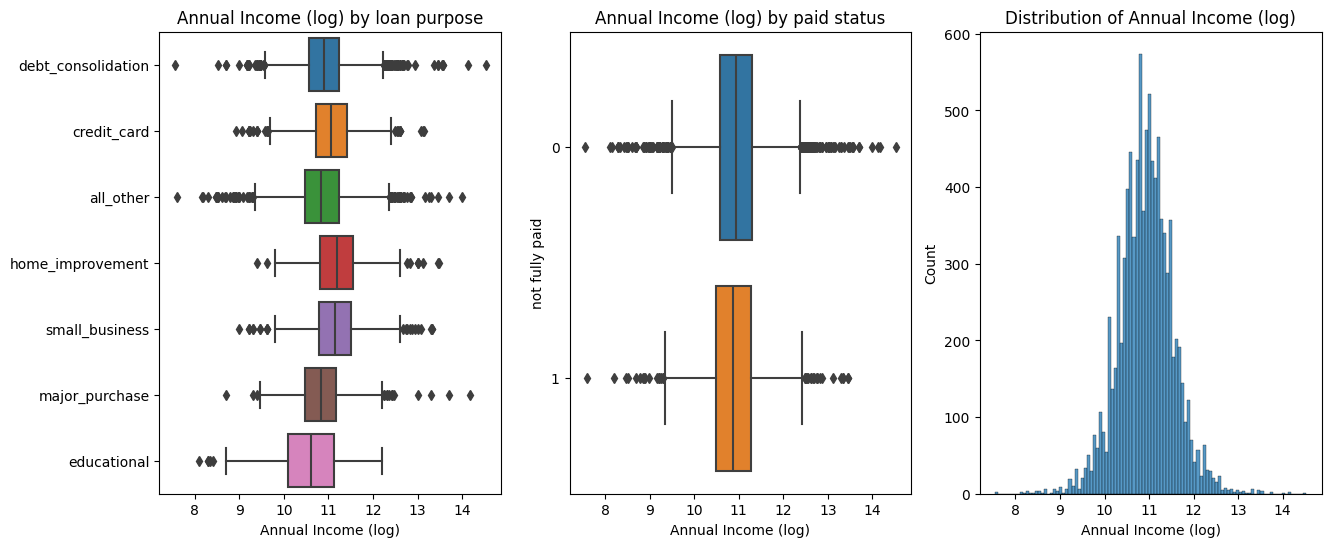

In [18]:
show_distribution('log_annual_inc', "Annual Income (log)")

There is nothing to observe here, the feature is normally distributed as expected.

#### dti, Debt-to-Income ratio
From the data dictionary: "The debt-to-income ratio of the borrower (amount of debt divided by annual income)."

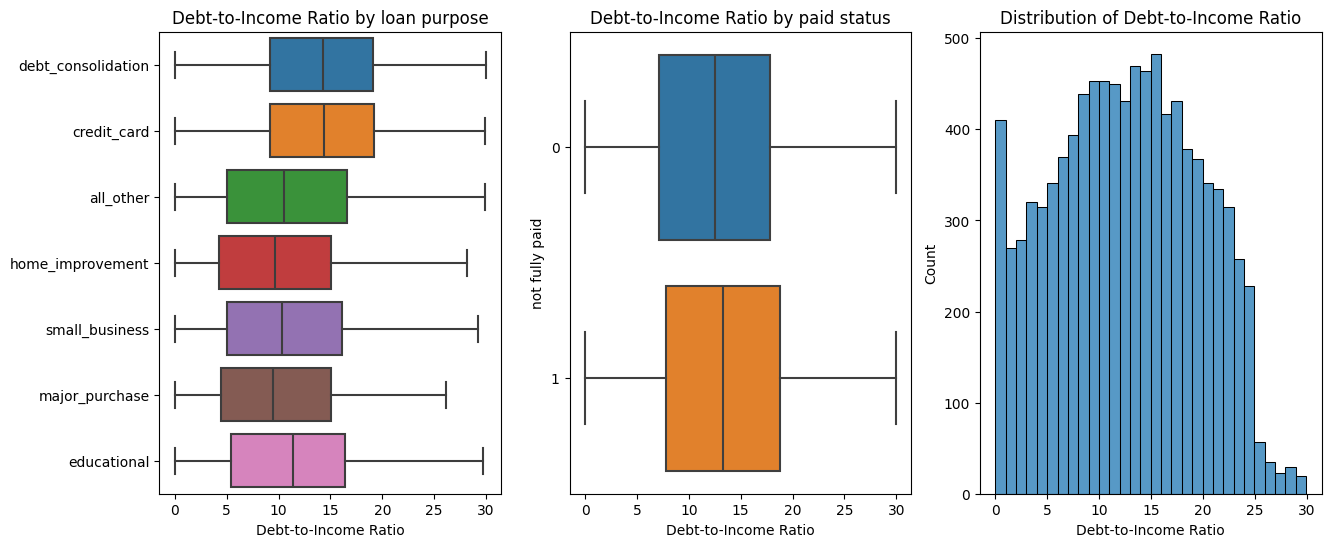

In [19]:
show_distribution('dti','Debt-to-Income Ratio')

It looks like people with higher debt-to-income ratios, i.e. those that have larger debts, tend to get loans for debt consolidation and credit card funding. The ***dti* does not seem to greatly affect whether a loan is fully paid back or not.** The distribution shows that a lot of loans are taken by people with 0 *dti* or *dti* in the lower range, and very few people with *dti* higher than 25.

#### fico, FICO score
From the data dictionary: "The FICO credit score of the borrower." *FICO is a comparative estimate of creditworthiness*

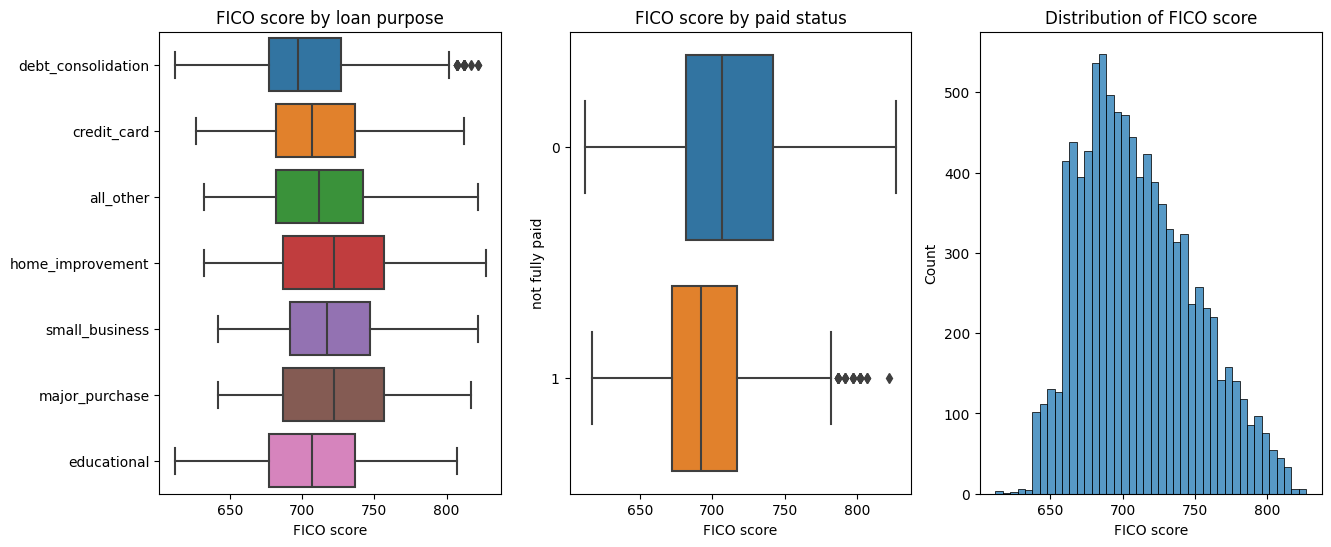

In [20]:
show_distribution('fico', "FICO score")

There is nothing special to note regarding FICO by loan purpose, but it seems like **people paying back their loans have higher FICO scores**, i.e. more creditworthiness; this might be a good indicator to predict if a loan will be fully  paid back. For FICO scores greater than 700, the amount of people having higher scores gradually decreases.

### Conclusions of exploratory analysis
So, here are the insights & conclusions drawn so far:
1. people that do not meet credit criteria are more prone to not pay back a loan
1. the purpose of a loan is related to paid-back status
1. loans for small businesses tend to have higher interest rates
1. loans for small businesses and debt consolidation have the highest installements
1. small business loans have $120 higher installments than other loans, on average
1. log of income does not relate to fully-paid status
1. dti does not greatly relate to fully-paid status
1. higher FICO scores indicate fully-paid back loans

*It should be noted that **although individually some features seem unrelated to paid-back status, their combination might have higher predictive value.** Such analysis goes beyond the scope of this notebook, although any such correlations might be captured by the models trained later.*

### Further work
The same analysis can be performed for all features; the methodology is the same as above.

## QUESTION 1: - Find out what kind of people take a loan for what purposes.
---
In order to answer this question, the persons taking loans will be divided into clusters. Then, the characteristics of each cluster will be shown as well as the purpose(s) the loans of this cluster were taken for.  
A model will trained for every number of clusters from 1 to 10 and its inertia score will be calculated and drawn on the chart below. The "elbow method" guides us to choose the point with the greatest change in the curve, which looks like an elbow in the chart.


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# prepare the dataset for KMeans Clustering
df_clustering = df_clean[["log_annual_inc", "dti", "fico"]] #PERSON
# scale the dataset values for clustering
df_clustering = StandardScaler().fit_transform(df_clustering)

inertias=[]
# fit different models with 1-10 clusters and gather the inertia of each model in a list
for k in range(1,11):
    km=KMeans(k)    
    km.fit(df_clustering)
    inertias.append(km.inertia_)    
  

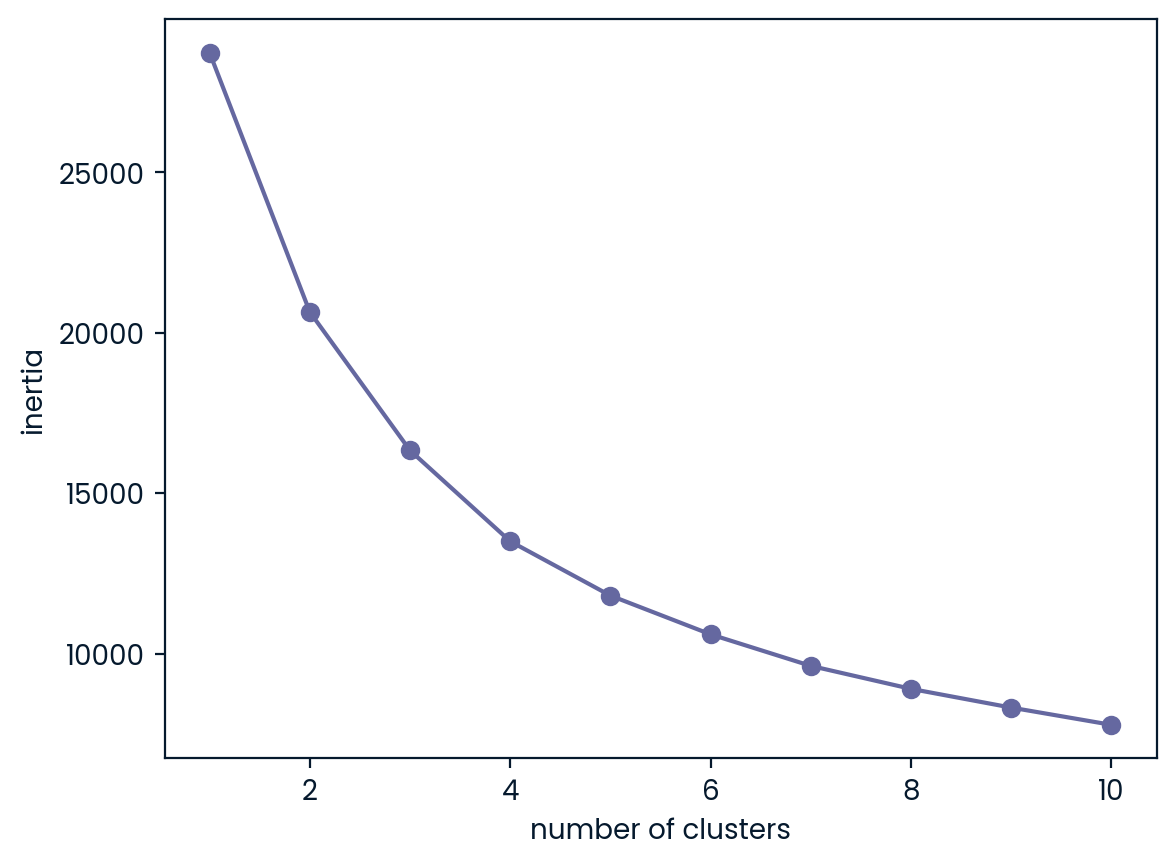

In [17]:
# plot the inertias to use the elbow method
plt.plot(range(1,11),inertias, marker = 'o')
plt.xlabel("number of clusters")
plt.ylabel("inertia");

According to the elbow method for the chart above, 3 or 4 clusters is the optimal choice; we 'll go with 3 for simplicity's sake. Let's examine the characteristics of each cluster by take the averages of its members:

In [18]:
# fit the chosen KMeans model for 3 clusters
km = KMeans(3, random_state=42)
km.fit(df_clustering)
# add the cluster labels to the dataframe
df_clean['cluster'] = km.labels_

# show the PERSON characteristics for each cluster (using the average value)
df_clean.groupby('cluster')[PERSON].mean()

,log_annual_inc,dti,fico,inq_last_6mths,delinq_2yrs,pub_rec
cluster,,,,,,
0,11.256652,8.199747,751.667605,1.311994,0.068238,0.022863
1,10.967790,18.769314,696.078883,1.686428,0.179569,0.072513
2,10.526138,7.836938,689.816157,1.690449,0.241978,0.087958



We can name the clusters according to the characteristics above. The three last features have little differences between clusters; these qualities are defined *after* taking the loan, anyway, so will not be taken into account: 
- Cluster 0: **"Trustworthy"** Persons with the highest income in the set; also highest fico and normal debt-to-income (dti) ratio. 
- Cluster 1: **"Debtors"** Persons with the highest dti ratio, and average annual income & fico score.
- Cluster 2: **"High Risk"** Lowest income in the set, lowest dti ratio, low fico. 


|Cluster name | annual income | dti ratio | fico score |
|-------------|---------------|-----------|------------|
| Trustworthy | HIGH          | AVERAGE   | HIGH       |
| Debtors     | AVERAGE       | HIGH      | AVERAGE    |
| High Risk   | LOW           | LOW       | LOW        |

Now, let's see the kind of loans by cluster:

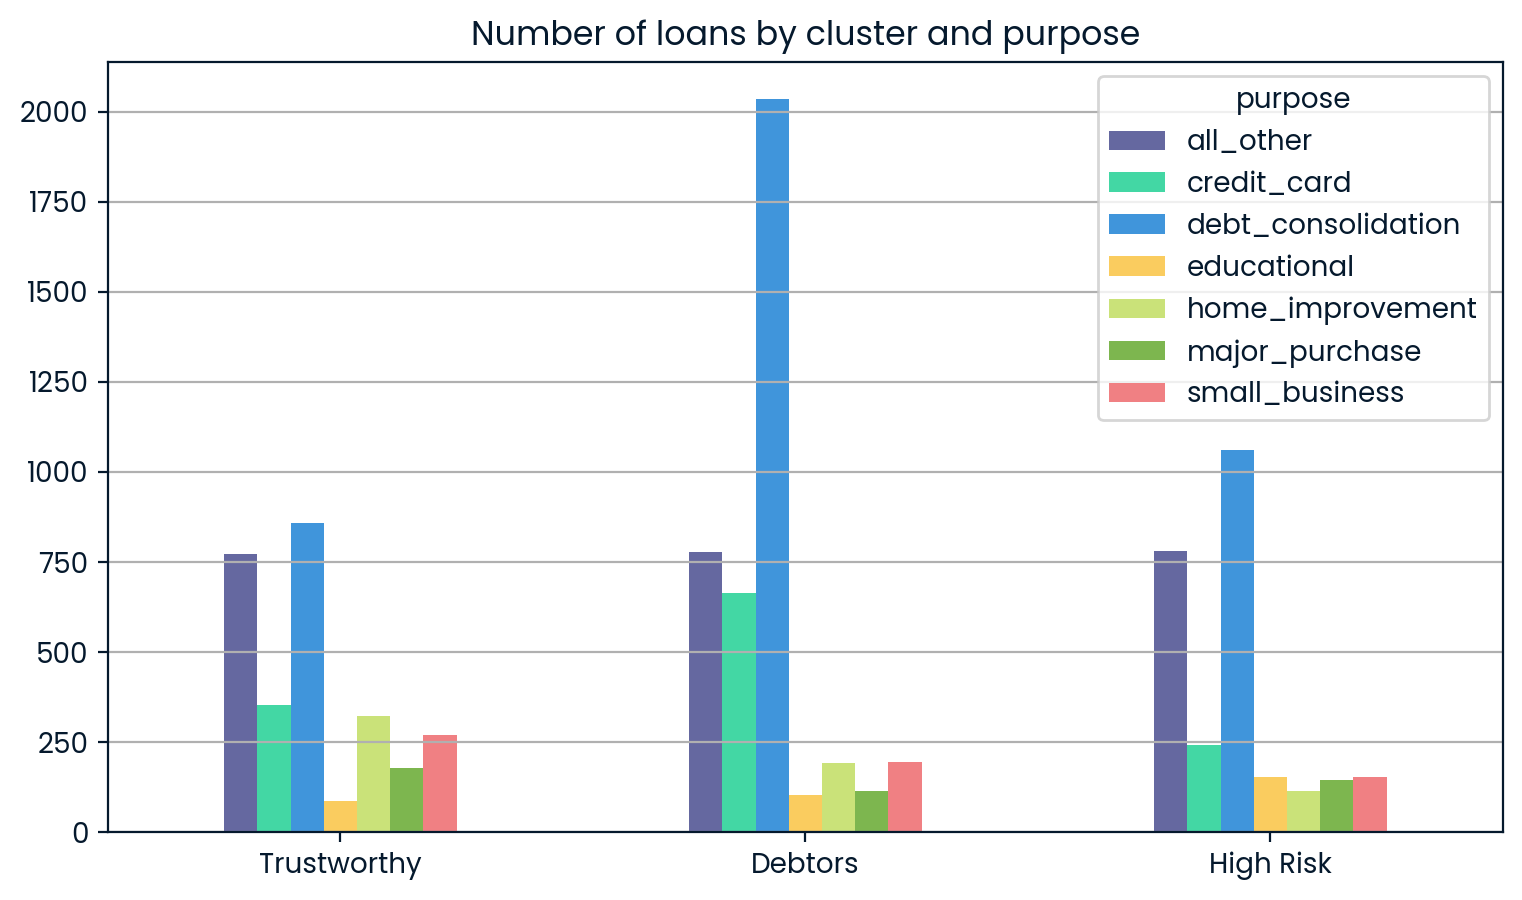

In [19]:
# plot the loan purposes for each cluster
pd.crosstab(df_clean.cluster, df_clean.purpose).rename({0:"Trustworthy",1:"Debtors",2:"High Risk"}).plot.bar(figsize=(9,5), rot=0, sort_columns=False, )
plt.grid(axis='y')
plt.xlabel("")
plt.title("Number of loans by cluster and purpose");

### ANSWER 1
So, we can see the different kinds of people and the purpose they take the loans for:
* the "debtors" take loans mostly to consolidate their debt and fund their credit cards
* the "trustworthy" people want to expand their business or to enjoy their good status with home improvements and major purchases, almost twice as much as the other clusters
* the people in the "high risk" category, are taking loans for a mix of purposes, but more than the other clusters for educational purposes; perhaps they are students having low income & fico score, sinec they have not gone into the work arena yet. 

Finally, let's see the ratio of fully paid back loans by cluster:

In [20]:
df_clean.groupby('cluster')['not_fully_paid'].mean().round(3)

cluster
0    0.105
1    0.177
2    0.193
Name: not_fully_paid, dtype: float64

 As expected, the "Trustworthy" cluster (0) had only 10.5% of their loans not fully paid back, whereas for the "High risk" cluster the ratio is almost double, 19.3% 
 
### Further work:
In this scenario the clusters were divided based on three features, from the insights we had from the previous question. But there are more features available, and an analysis on those might give more useful insights. Also, maybe 4 clusters or 5 might be more useful if we need to seperate the loans and borrowers with more granularity.


 
## QUESTION 2: How long does it take to payback a loan?
---

There are not many suitable features to use for this question; the best one seems to be *days_with_cr_line* assuming that the person has credit line for as long as the loan exists. We will only consider the loans that are fully paid back, for obvious reasons!

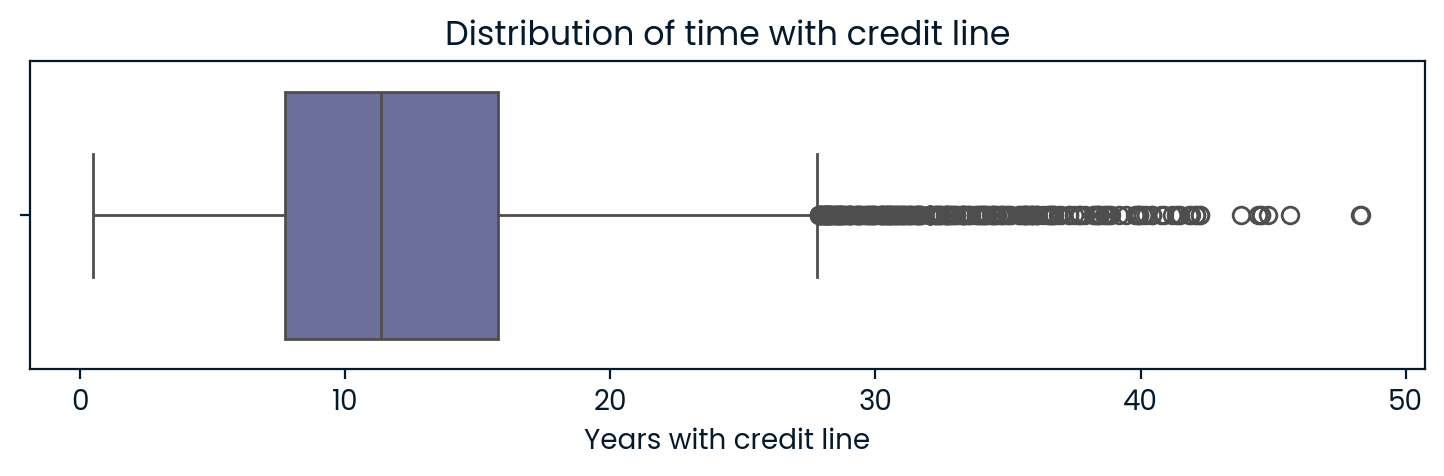

In [21]:
paid_back = df_clean.query('not_fully_paid == 0')

plt.figure(figsize=(9,2))
sns.boxplot(x=paid_back.days_with_cr_line/365) #divide by 365 to show years instead of days
plt.xlabel("Years with credit line")
plt.title("Distribution of time with credit line");

The boxplot shows that most people have a credit line for 8-15 years (blue box), with the average being around 11 years. Only 5% have credit lines for periods longer than 27 years (the dots to the right of the bracket). Let's see if the credit line periods change according to the purpose of the loan:

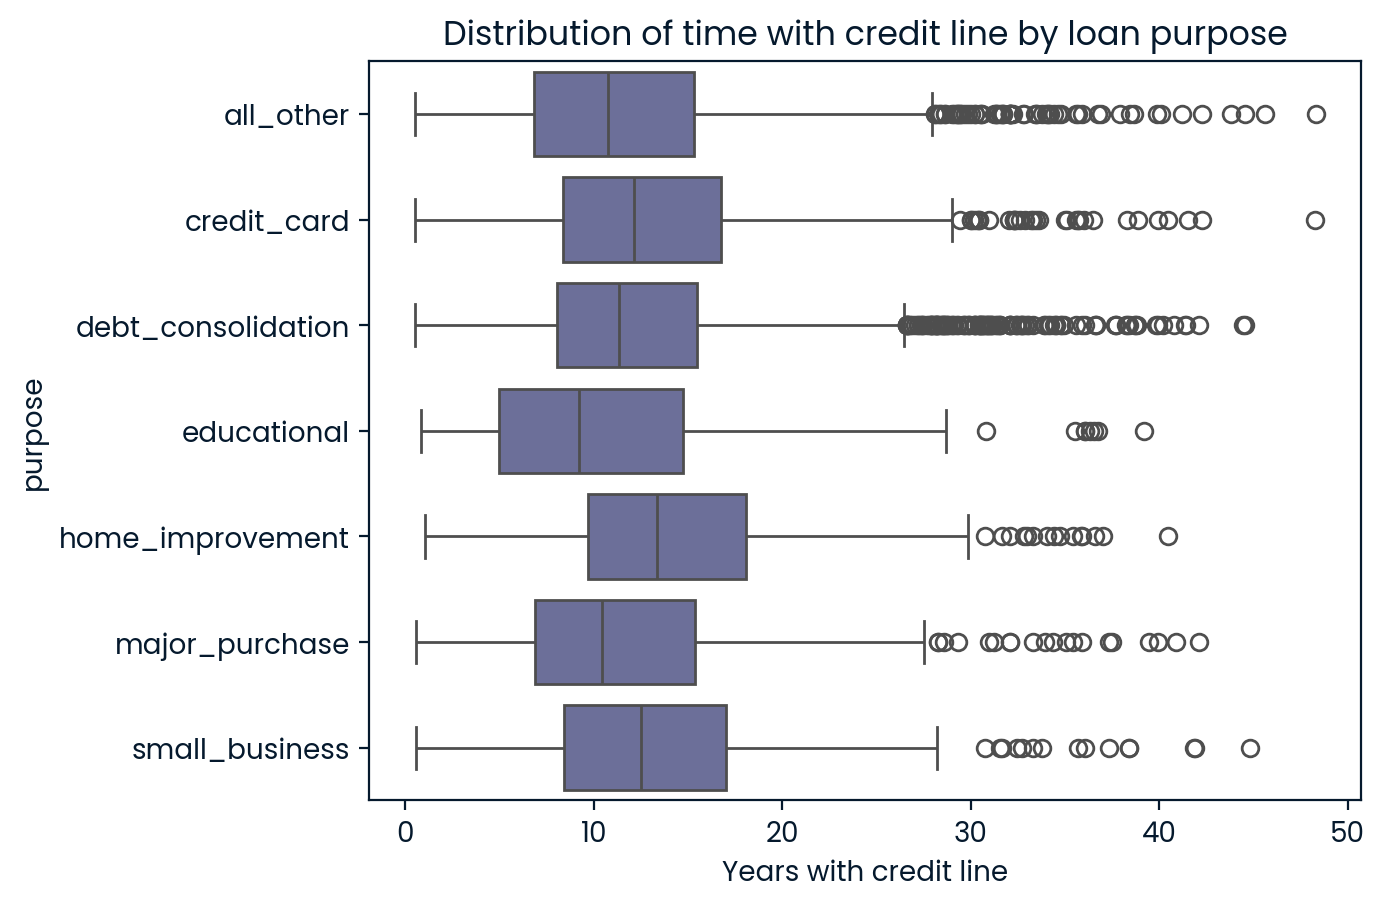

In [23]:
sns.boxplot(x=paid_back.days_with_cr_line/365, y=paid_back['purpose'].astype('category'))
plt.xlabel("Years with credit line")
plt.title("Distribution of time with credit line by loan purpose");

All purposes have the same distribution of time with credit line, more or less; we cannot draw a solid conclusion from that data.

In the previous question we divided the loans to three clusters, 0:"Trustworthy", 1:"Debtors", 2:"High Risk". Now, let's see if the credit line distribution is different for each cluster:

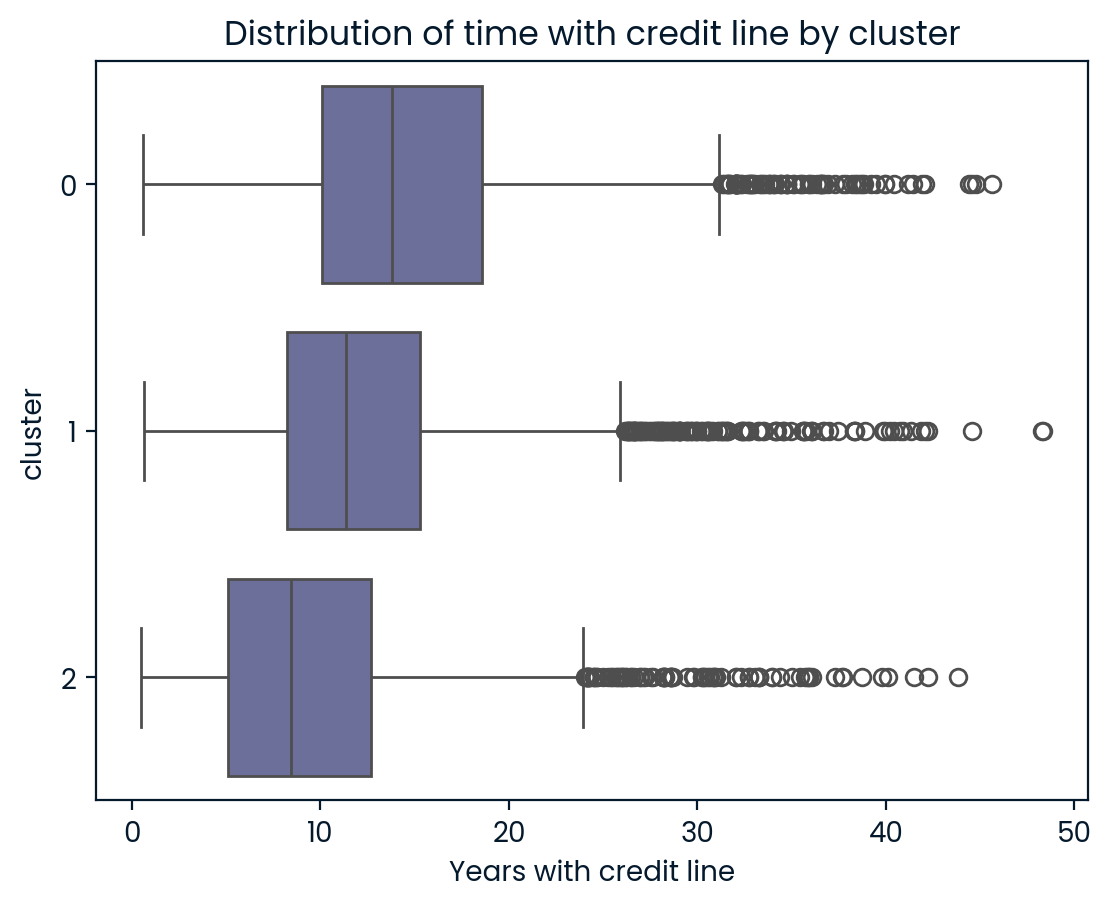

In [24]:
sns.boxplot(x=paid_back.days_with_cr_line/365, y=paid_back['cluster'].astype('category'))
plt.xlabel("Years with credit line")
plt.title("Distribution of time with credit line by cluster");

The differences are plain to see: the "High Risk" has shorter loans, between 5-12 years, the "Debtors" are between 9-14 years, while the "Trustworthy" group enjoys longer lines, 11-18 years.

### Answer 2:
According to the data available, **a loan is generally paid back in 8-15 years, with the avearage being 11 years.** The purpose of the loan does not seem to affect the pay back time, but the quality of the person taking the loan does: **higher risk loans tend to be paid back sooner**, they have shorter credit lines.

#### Further work
Perhaps the selected feature (days_with_credit_line) is not the best one to use. Better understanding of the market area might help to select or engineer better features to answer this question. 

## QUESTION 3: Predict the probability a user will be able to pay back their loan 
---

The predictions will be made by a machine learning model. We are going to select the features to be used, build a model, train it and evaluate it.


## Feature Engineering

In [24]:
# Perform feature engineering
df_clean["installment_to_income_ratio"] = (
    df_clean["installment"] / df_clean["log_annual_inc"]
)
df_clean["credit_history"] = (df_clean["delinq_2yrs"] + df_clean["pub_rec"]) / df_clean[
    "fico"
]

## Preprocessing and Balancing the Data

Dropping unnecessary columns and converting the categorical variables to numerical ones.

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_clean = df_clean.drop(['credit_policy', 'days_with_cr_line', 'purpose'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df_clean['not_fully_paid'] = le.fit_transform(df_clean['not_fully_paid'])

Scaling the numerical features using Standard Scaler. 

In [29]:
scaler = StandardScaler()
numerical_cols = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec','credit_history','installment_to_income_ratio']
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

Handling class imbalancing using imblearn’s oversampling method. 

In [31]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = df_clean.drop('not_fully_paid', axis=1)
y = df_clean['not_fully_paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

df_clean = pd.concat([X_resampled, y_resampled], axis=1)
df_clean['not_fully_paid'].value_counts()

not_fully_paid
0    8043
1    8043
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df_clean.drop('not_fully_paid', axis=1)
y = df_clean['not_fully_paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Train models for benchmarking

We will train four models for classification:
* Logistic Regression
* Random Forest Classifier
* SVC
* XGBClassifier

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42, probability=True)
svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [47]:
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, f1_score, precision_score

def show_scores(models, X_train, y_train, X_test, y_test):
    
    scores = []

    for m in models:
        y_pred_train = m.predict(X_train)
        y_pred_test = m.predict(X_test)
        y_pred_proba_train = m.predict_proba(X_train)
        y_pred_proba_test = m.predict_proba(X_test)
        name = f"{m}".split("(")[0]
        
        # Add various scores for training and testing sets
        scores.append([name, 'roc_auc', 'train', roc_auc_score(y_train, y_pred_proba_train[:,1])])
        scores.append([name, 'roc_auc', 'test', roc_auc_score(y_test, y_pred_proba_test[:,1])])
        scores.append([name, 'recall', 'train', recall_score(y_train, y_pred_train)])
        scores.append([name, 'recall', 'test', recall_score(y_test, y_pred_test)])
        scores.append([name, 'f1', 'train', f1_score(y_train, y_pred_train)])
        scores.append([name, 'f1', 'test', f1_score(y_test, y_pred_test)])
        scores.append([name, 'accuracy', 'train', accuracy_score(y_train, y_pred_train)])
        scores.append([name, 'accuracy', 'test', accuracy_score(y_test, y_pred_test)])

    scores_df = pd.DataFrame(scores, columns=['model_name', 'metric', 'set', 'score'])
    
    # Visualize the scores using seaborn's catplot
    sns.catplot(data=scores_df.query("set == 'test'"), y='model_name', x='score', col='metric', kind='bar')
    
    # Display the score dataframe in a pivot table format
    display(scores_df.pivot(index='model_name', columns=['metric','set'], values='score').round(2))

    return scores_df

#### Evaluation of models
We need to show how good a model is.  The standard score to use for imbalanced sets is *roc_auc.* Additionally *recall* & *f1 score* will be used, with *accuracy* for reference. *Recall* is the model's ability to not miss positives, while *F1 score* is the balance between recall & precision.

metric                 roc_auc       recall          f1       accuracy      
set                      train  test  train  test train  test    train  test
model_name                                                                  
DecisionTreeClassifier    1.00  0.81   1.00  0.83  1.00  0.81     1.00  0.81
LogisticRegression        0.67  0.67   0.63  0.62  0.62  0.61     0.61  0.61
RandomForestClassifier    1.00  0.96   1.00  0.88  1.00  0.89     1.00  0.89
SVC                       0.74  0.71   0.72  0.70  0.69  0.67     0.68  0.66

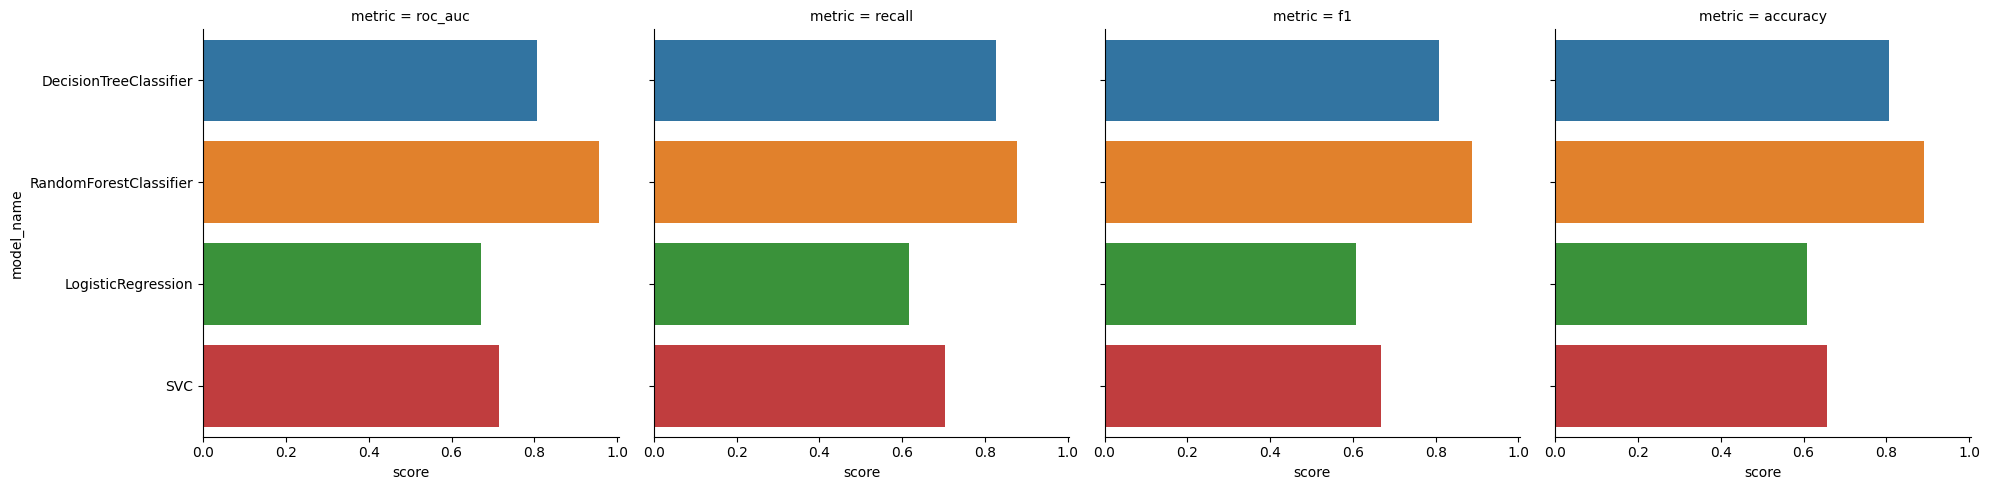

In [48]:
final_score = show_scores([dt, rf, lr, svm], X_train, y_train, X_test, y_test)

We see that the *Decision* and *Random Forest* models had the best roc_auc score for the test set. The *RandomForest* classifier has outperformed all models in each evaluation criteria section.

Saving the model using joblib. 

In [64]:
import joblib
# Save the best model to disk
joblib.dump(rf, 'loan_classifier.joblib')

['loan_classifier.joblib']

### GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

### LOGISTIC REGRESSION
params_lr = {
    'C' : np.arange(0.1, 1.3, 0.3),
    'max_iter' : np.arange(50,2000,100),
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

lr_cv = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
                     param_grid=params_lr,
                     cv=3,
                     n_jobs=-1,
                     verbose=1,
                     scoring='roc_auc'
                    )

#lr_cv.fit(X_train, y_train)
#best_params_lr = lr_cv.best_params_
#print("Best params: ",best_params_lr)

#Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
#best_params_lr = {'C': 0.4, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
#Wall time: 13min 7s


In [52]:
params_rf = {
    'max_depth' : np.arange(3,9,1),
    'max_leaf_nodes' : np.arange(7,22,1),
    'min_samples_leaf': np.arange(1,5),
}


rf_cv = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                     param_grid=params_rf,
                     cv=3,
                     n_jobs=-1,
                     verbose=1,
                     scoring='roc_auc'
                    )

#rf_cv.fit(X_train_eng, y_train)
#best_params_rf = rf_cv.best_params_
#print("Best params: ",best_params_rf)

#Fitting 3 folds for each of 360 candidates, totalling 1080 fits
#best_params_rf =  {'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 3}
#Wall time: 1min 43s


In [53]:
params_svc = {
    'kernel' : [ 'linear', 'poly', 'rbf', 'sigmoid', ],
    'max_iter' : [-1,50000,100000,200000,300000],
    'gamma' : ['scale','auto', 0.001, 0.01, 0.1]
}


svc_cv = GridSearchCV(estimator=SVC(probability=True, class_weight='balanced', verbose=3),
                     param_grid=params_svc,
                     cv=3,
                     n_jobs=-1,
                     verbose=3,
                     scoring='roc_auc'
                     )

#svc_cv.fit(X_train, y_train)
#best_params_svc = svc_cv.best_params_
#print("Best params: ",best_params_svc)
#Fitting 3 folds for each of 100 candidates, totalling 300 fits
#best_params_svc = {'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1}
#Wall time: 30min 6s


In [55]:
params_xgb = {
    "max_depth": [4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.3, 0.6],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [ 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8],
    "colsample_bytree": [0.5, 0.6, 0.7],
}

xgb_cv = GridSearchCV(estimator=XGBClassifier(scale_pos_weight = 0.1903518, n_jobs=-1, verbose=3),
                     param_grid=params_xgb,
                     cv=3,
                     n_jobs=-1,
                     verbose=3,
                     scoring='roc_auc'
                     )

#xgb_cv.fit(X_train, y_train)
#best_params_xgb = xgb_cv.best_params_

#best_params_xgb = {'colsample_bytree': 0.5, 'gamma': 0.6, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 4, 'subsample': 0.7}

### Train models with the best results from Grid Search
With the newly-found best hyperparameters, we can train each model and see the results:

In [57]:
### Assign the best hyperparams as computed earlier by GridSerachCV
best_params_lr = {'C': 0.4, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
best_params_rf =  {'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 3}
best_params_svc = {'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1}
best_params_xgb = {'colsample_bytree': 0.5, 'gamma': 0.6, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 4, 'subsample': 0.7}

metric                 roc_auc       recall          f1       accuracy      
set                      train  test  train  test train  test    train  test
model_name                                                                  
LogisticRegression        0.67  0.67   0.63  0.62  0.62  0.61     0.61  0.61
RandomForestClassifier    0.76  0.76   0.73  0.73  0.70  0.69     0.68  0.68
SVC                       0.67  0.67   0.67  0.66  0.64  0.63     0.62  0.61
XGBClassifier             0.84  0.83   1.00  0.99  0.69  0.68     0.55  0.55

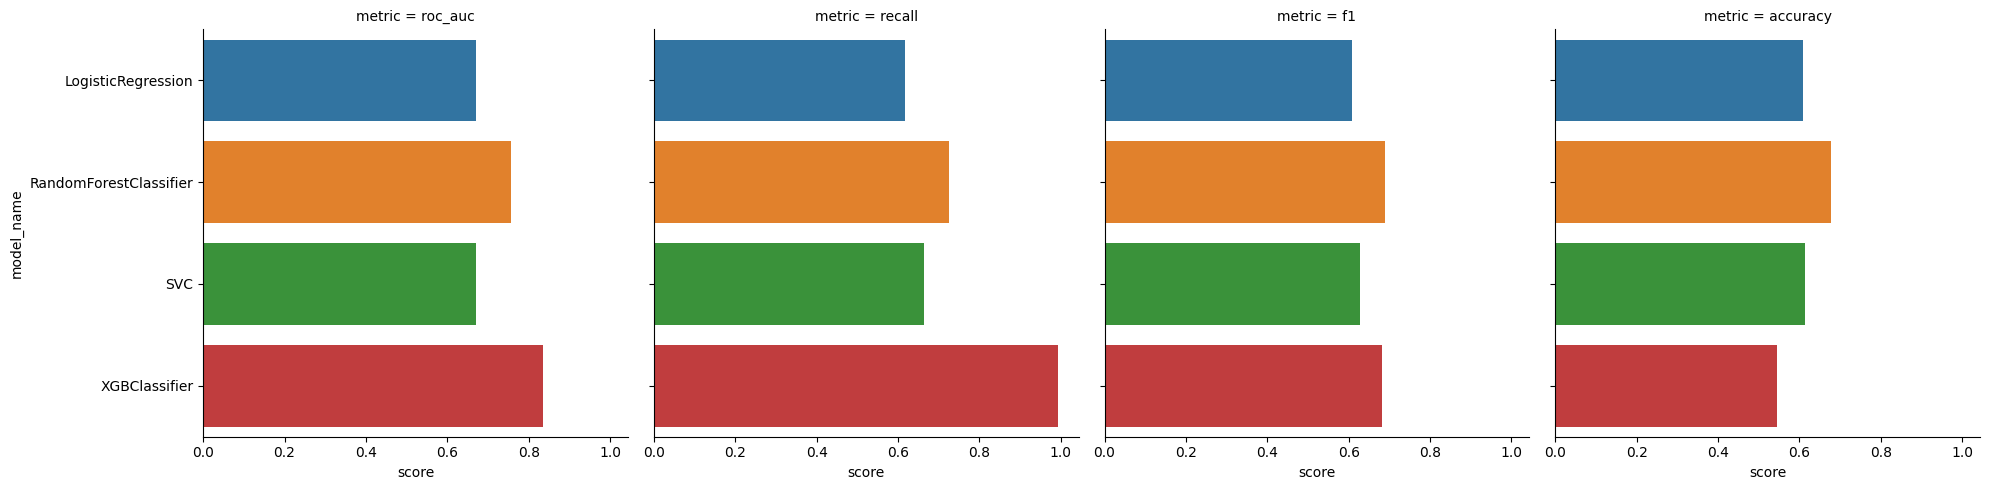

In [59]:
### train models with the hyperparams found by GridSearchCV :
lr_cv = LogisticRegression(**best_params_lr)
lr_cv.fit(X_train, y_train)
rf_cv = RandomForestClassifier(**best_params_rf)
rf_cv.fit(X_train, y_train)
svc_cv= SVC(**best_params_svc, probability=True)
svc_cv.fit(X_train, y_train)
xgb_cv= XGBClassifier(**best_params_xgb)
xgb_cv.fit(X_train, y_train)

scores_best = show_scores([lr_cv, rf_cv, svc_cv, xgb_cv], X_train, y_train, X_test, y_test)

No improvements showing

Another process that may prove helpful is the Calibration of Probabilities, with a method known as *Platt Scaling;* for the SVC model  *Isotonic Regression* will be used.

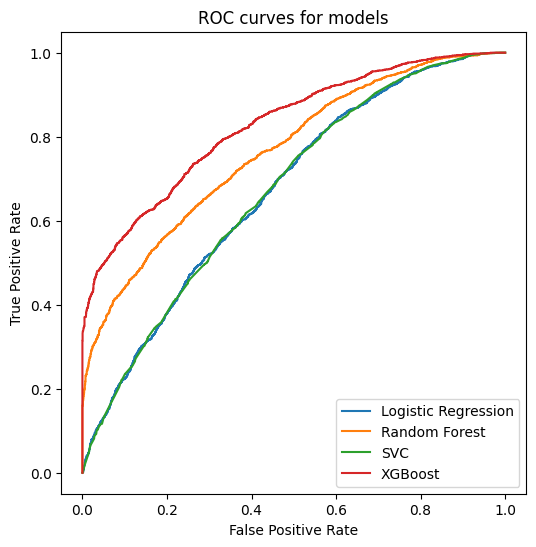

In [62]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calibrate each of the CV models
lr_cal = CalibratedClassifierCV(lr_cv, method='sigmoid', cv=3)
rf_cal = CalibratedClassifierCV(rf_cv, method='sigmoid', cv=3)
svc_cal = CalibratedClassifierCV(svc_cv, method='isotonic', cv=3)
xgb_cal = CalibratedClassifierCV(xgb_cv, method='sigmoid', cv=3)

# Fit the calibrated models
lr_cal.fit(X_train, y_train)
rf_cal.fit(X_train, y_train)
svc_cal.fit(X_train, y_train)
xgb_cal.fit(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(6,6))

# Iterate over the calibrated models and their original names
for model, name in zip([lr_cal, rf_cal, svc_cal, xgb_cal], ['Logistic Regression', 'Random Forest', 'SVC', 'XGBoost']):
    fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name)

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for models")
plt.show()

In the roc curve, the more area there is under a curve, the better the model performs; the area under the curve is the *roc_auc* score we used before. We see in the plot that there is no clear difference in the curves, all models seem to perform equally well.

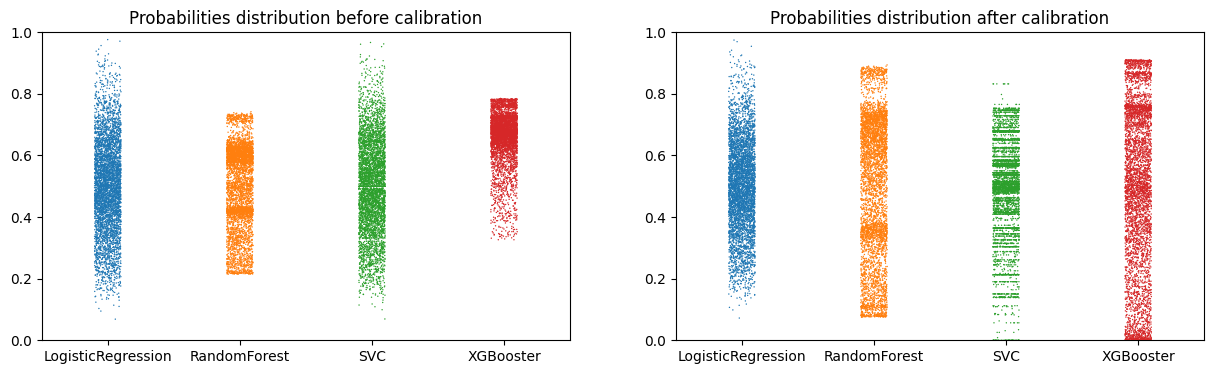

In [63]:
#create a dataframe with the probabilities BEFORE calibration
probas_cv = pd.DataFrame({
    "LogisticRegression" : lr_cv.predict_proba(X_test)[:,1],
    "RandomForest" : rf_cv.predict_proba(X_test)[:,1],
    "SVC":svc_cv.predict_proba(X_test)[:,1],
    "XGBooster":xgb_cv.predict_proba(X_test)[:,1]
})
#create a dataframe with the probabilities AFTER calibration
probas_cal = pd.DataFrame({
    "LogisticRegression" : lr_cal.predict_proba(X_test)[:,1],
    "RandomForest" : rf_cal.predict_proba(X_test)[:,1],
    "SVC":svc_cal.predict_proba(X_test)[:,1],
    "XGBooster":xgb_cal.predict_proba(X_test)[:,1]
})

# draw the stripplots
fig, axes = plt.subplots(1,2, figsize=(15,4))
sns.stripplot(data=probas_cv, size=1, ax=axes[0])
axes[0].set_title("Probabilities distribution before calibration")
axes[0].set_ylim(0,1)
sns.stripplot(data=probas_cal, size=1, ax=axes[1])
axes[1].set_title("Probabilities distribution after calibration")
axes[1].set_ylim(0,1);

### Answer 3 and Conclusions
That was a long way to go! We saw how the model performances increased with feature engineering and fine-tuning. Finally, the models reached a point where no further progress could be made.

**The best model to predict the probability of a loan not being fully paid seems to be: *RandomForestClassifier*, with marginally better performance than *DecisioTree***.

* Since the model predicts "not paid" and the question is about the probability of "being paid", we would have to select the model's probability for *class 0*, instead of *class 1*.

* Finally, the performance of few model really good close to 90%. 

#### Further work
There are other classifiers that were not included in this workbook, e.g. KNN & ensemble classifiers. Maybe these would perform better under the bad circumstances of this dataset. Perhaps more options in the Grid Search might reveal even better hyperparameters for the models, but this would take much more time training the models, and is not possible in this jupyter environment.
